### Importação das bibiliotecas

In [323]:
import pandas as pd
import numpy as np
import json

In [324]:
# Leitura dos dados

df = pd.read_json(
    r'C:\Estudos\alura\data-science\8-tratamento-dados\dados\dataset-telecon.json'
)

In [325]:
# Visualização dos dados

df.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [326]:
# Normalização da coluna conta

pd.json_normalize(df['conta']).head()

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85
3,mes a mes,sim,cheque eletronico,98.0,1237.85
4,mes a mes,sim,cheque pelo correio,83.9,267.4


In [327]:
# Normalização da coluna telefone

pd.json_normalize(df['telefone']).head()

,servico_telefone,varias_linhas
0,sim,nao
1,sim,sim
2,sim,nao
3,sim,nao
4,sim,nao


#### Abertura do arquivo com a bibilioteca json

In [328]:
with open(
    r'C:\Estudos\alura\data-science\8-tratamento-dados\dados\dataset-telecon.json',
    'r'
) as f:
    json_bruto = json.load(f)
    f.close()

In [329]:
json_bruto[0]

{'id_cliente': '0002-ORFBO',
 'Churn': 'nao',
 'cliente': {'genero': 'feminino',
  'idoso': 0,
  'parceiro': 'sim',
  'dependentes': 'sim',
  'tempo_servico': 9},
 'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
 'internet': {'servico_internet': 'DSL',
  'seguranca_online': 'nao',
  'backup_online': 'sim',
  'protecao_dispositivo': 'nao',
  'suporte_tecnico': 'sim',
  'tv_streaming': 'sim',
  'filmes_streaming': 'nao'},
 'conta': {'contrato': None,
  'faturamente_eletronico': None,
  'metodo_pagamento': None,
  'cobranca': {'mensal': None, 'Total': None}}}

#### Normalização do json bruto

In [330]:
# Normalização de todas as colunas de uma vez só

dados_normalizados = pd.json_normalize(json_bruto)

dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [331]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [332]:
'''
Cliente

genero: gênero (masculino e feminino)
idoso: informação sobre um(a) cliente ter ou não idade igual ou maior que 65 anos
parceiro: se o(a) cliente possui ou não um(a) parceiro ou parceira
dependentes: se o(a) cliente possui ou não dependentes
tempo_servico: meses de contrato do(a) cliente
Serviço de telefonia

servico_telefone: assinatura de serviço telefônico
varias_linhas: assinatura de mais de uma linha de telefone
Serviço de internet

servico_internet: assinatura de um provedor internet
seguranca_online: assinatura adicional de segurança online
backup_online: assinatura adicional de backup online
protecao_dispositivo: assinatura adicional de proteção no dispositivo
suporte_tecnico: assinatura adicional de suporte técnico, menos tempo de espera
tv_streaming: assinatura de TV a cabo
filmes_streaming: assinatura de streaming de filmes
Conta

contrato: tipo de contrato
faturamente_eletronico: se o(a) cliente prefere receber a fatura online
metodo_pagamento: forma de pagamento
cobranca.mensal: total de todos os serviços do(a) cliente por mês
cobranca.Total: total gasto pelo(a) cliente
''';

In [333]:
# Identificação dos valores nulos

dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' ']

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,
2308,3213-VVOLG,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.35,
2930,4075-WKNIU,nao,feminino,0,sim,sim,0.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cheque pelo correio,73.35,
3134,4367-NUYAO,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.75,
3203,4472-LVYGI,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,sim,nao,dois anos,sim,transferencia bancaria (automatica),52.55,
4169,5709-LVOEQ,nao,feminino,0,sim,sim,0.0,sim,nao,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,cheque pelo correio,80.85,


In [334]:
# Seleção de algumas colunas nas mesmas amostras que contém dados nulos

dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico',
     'conta.contrato',
     'conta.cobranca.mensal',
     'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [335]:
# Índices das amostras nulas

idx = dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico',
     'conta.contrato',
     'conta.cobranca.mensal',
     'conta.cobranca.Total']
].index

In [336]:
# Substituição de alguns dos valores nulos

dados_normalizados.loc[
    idx,
    'conta.cobranca.Total'
] = dados_normalizados.loc[idx, 'conta.cobranca.mensal'] * 24

In [337]:
# Mudança do tipo de object para np.float64

dados_normalizados['conta.cobranca.Total'] = dados_normalizados[
    'conta.cobranca.Total'
].astype(np.float64)

In [338]:
dados_normalizados.loc[
    idx,
    'cliente.tempo_servico'
] = 24

In [339]:
# Verificação das amostras

dados_normalizados.loc[idx][
    ['cliente.tempo_servico',
     'conta.contrato',
     'conta.cobranca.mensal',
     'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [340]:
# Mudança da coluna conta.cobranca.Total para np.float64

dados_normalizados['conta.cobranca.Total'] = dados_normalizados[
    'conta.cobranca.Total'
].astype(np.float64)

In [341]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [342]:
# Visualização de todos os dados únicos de todas as colunas

for col in dados_normalizados.columns:
    print(f'Coluna: {col}')
    print(dados_normalizados[col].unique())
    print('')
    print('-=' * 30)
    print('')

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Coluna: Churn
['nao' 'sim' '']

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Coluna: cliente.genero
['feminino' 'masculino']

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Coluna: cliente.idoso
[0 1]

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Coluna: cliente.parceiro
['sim' 'nao']

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Coluna: cliente.dependentes
['sim' 'nao']

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+0

In [343]:
# Visualização dos dados nulos da coluna churn

dados_normalizados.query("Churn == ''")

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


In [344]:
# Remoção dos dados nulos

dados_sem_vazio = dados_normalizados[
    dados_normalizados['Churn'] != ''
].copy().reset_index(drop=True)

In [345]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   o

In [346]:
# Visualização de dados duplicados

dados_sem_vazio[dados_sem_vazio.duplicated()]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [347]:
# Remoção dos dados duplicados

dados_sem_vazio.drop_duplicates(inplace=True)

In [348]:
# Verificação da remoção dos dados duplicados

dados_sem_vazio.duplicated().unique()

array([False])

In [349]:
# Dataframe booleano para verificação de nulos

dados_sem_vazio.isna()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [350]:
# Contagem de dados nulos em cada coluna

dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [351]:
# Soma de todos os dados nulos

dados_sem_vazio.isna().sum().sum()

np.int64(114)

In [352]:
# Visualização de amostras que contém ao menos um dado nulo

dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)].head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25


In [353]:
# Series booleana dos dados nulos da coluna cliente.tempo_servico

dados_sem_vazio['cliente.tempo_servico'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: cliente.tempo_servico, Length: 7043, dtype: bool

In [354]:
# Visualização de algumas colunas nas amostras com dados nulos

dados_sem_vazio[dados_sem_vazio['cliente.tempo_servico'].isna()][
    ['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [355]:
# Exemplo de substituição de valor nulo

int(np.ceil(5957.90 / 90.45))

66

In [356]:
# Substituição de nulos

dados_sem_vazio['cliente.tempo_servico'] = dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(
        dados_sem_vazio['conta.cobranca.Total'] / dados_sem_vazio['conta.cobranca.mensal']
    )
)

In [357]:
# Contagem de nulos na coluna cliente.tempo_servico

dados_sem_vazio['cliente.tempo_servico'].isna().sum()

np.int64(0)

In [358]:
# Contagem de nulos em cada coluna

dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [359]:
dados_sem_vazio['conta.contrato'].value_counts()

conta.contrato
mes a mes    3861
dois anos    1688
um ano       1463
Name: count, dtype: int64

In [360]:
dados_sem_vazio[['conta.contrato',
                 'conta.faturamente_eletronico',
                 'conta.metodo_pagamento']].isna().any(axis=1).sum()

np.int64(37)

In [361]:
# Remoção completa dos nulos

df_sem_nulos = dados_sem_vazio.dropna(
    subset=[
    'conta.contrato',
    'conta.faturamente_eletronico',
    'conta.metodo_pagamento']
).reset_index(drop=True).copy()

In [362]:
# Verificação da remoção completa dos nulos

df_sem_nulos.isna().sum().sum()

np.int64(0)

In [363]:
# Análise estatística dos dados

df_sem_nulos.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


In [364]:
import seaborn as sns

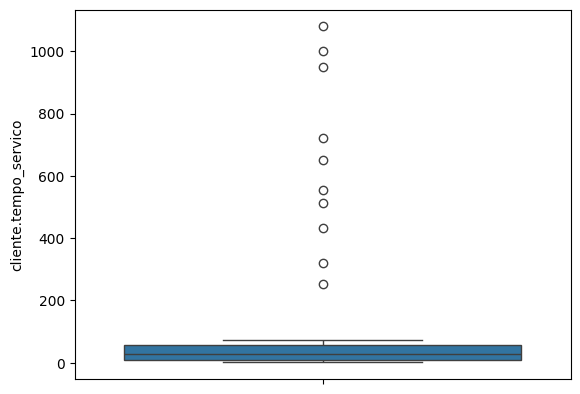

In [365]:
# Boxplot para visualização estatística

sns.boxplot(y=df_sem_nulos['cliente.tempo_servico']);

In [366]:
# Fórmula para encontrar outliers

q1 = df_sem_nulos['cliente.tempo_servico'].quantile(.25)
q2 = df_sem_nulos['cliente.tempo_servico'].quantile(.50)
q3 = df_sem_nulos['cliente.tempo_servico'].quantile(.75)
IQR = q3 - q1
limite_inferior = q1 - (1.5 * IQR)
limite_superior = q3 + (1.5 * IQR)

In [367]:
outliers_index = (
    df_sem_nulos['cliente.tempo_servico'] < limite_inferior
) | (
    df_sem_nulos['cliente.tempo_servico'] > limite_superior
)

In [368]:
# Visualização dos outliers numa series

df_sem_nulos[outliers_index]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente.tempo_servico, dtype: float64

In [369]:
df_sem_out = df_sem_nulos.copy()

In [370]:
df_sem_out[outliers_index]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente.tempo_servico, dtype: float64

In [371]:
# Correção de alguns outliers

df_sem_out.loc[outliers_index, 'cliente.tempo_servico'] = np.ceil(
    df_sem_out.loc[outliers_index, 'conta.cobranca.Total'] / df_sem_out.loc[outliers_index, 'conta.cobranca.mensal']
)

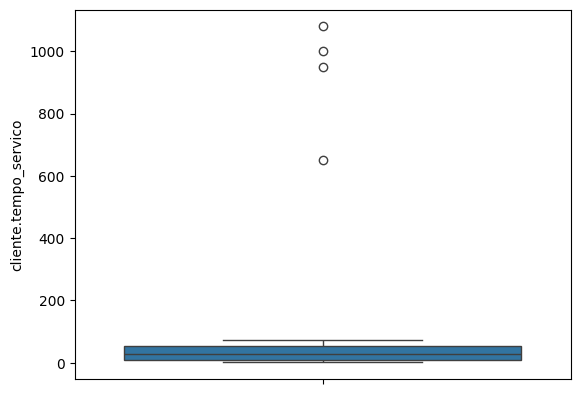

In [372]:
sns.boxplot(y=df_sem_out['cliente.tempo_servico']);

In [373]:
df_sem_out[outliers_index][[
    'cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total'
]]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55


In [374]:
q1 = df_sem_out['cliente.tempo_servico'].quantile(0.25)
q3 = df_sem_out['cliente.tempo_servico'].quantile(0.75)
IQR = q3 - q1

limite_inferior = q1 - 1.5 * IQR
limite_superior = q3 + 1.5 * IQR

outliers_index = (
    df_sem_out['cliente.tempo_servico'] < limite_inferior
) | (
    df_sem_out['cliente.tempo_servico'] > limite_superior
)

outliers_index

0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente.tempo_servico, Length: 7006, dtype: bool

In [375]:
# Remoção completa dos outliers que não foram consertados

df_sem_out = df_sem_out[~outliers_index]

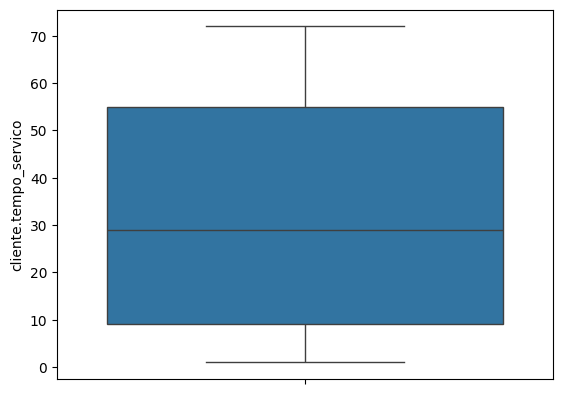

In [376]:
# Boxplot

sns.boxplot(y=df_sem_out['cliente.tempo_servico']);

In [377]:
df_sem_out = df_sem_out.reset_index(drop=True)

In [378]:
df_sem_id = df_sem_out.drop(columns=['id_cliente']).copy()

In [379]:
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


#### Troca de colunas categóricas binárias para numéricas para se adequar aos modelos de machine learning

In [380]:
mapeamento = {
    'nao': 0,
    'sim': 1,
    'masculino': 0,
    'feminino': 1
}

In [381]:
'''
for col in df_sem_id.columns:
    print(f'Coluna: {col}')
    print(df_sem_id[col].unique())
    print('-' * 30)
''';

In [382]:
colunas = ['telefone.servico_telefone', 'Churn',
           'cliente.parceiro', 'cliente.dependentes',
           'conta.faturamente_eletronico', 'cliente.genero']

In [383]:
pd.set_option('future.no_silent_downcasting', True)
df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)

In [384]:
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,1,0,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,1,0,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,1,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0,1,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
6998,1,0,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
6999,0,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
7000,0,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


In [385]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [386]:
pd.get_dummies(data=s, dtype=np.int64)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [387]:
df_dummies = pd.get_dummies(data=df_sem_id, dtype=np.int64).copy()

In [388]:
df_dummies.head()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total,Churn_0,Churn_1,cliente.genero_0,cliente.genero_1,cliente.parceiro_0,cliente.parceiro_1,...,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.faturamente_eletronico_0,conta.faturamente_eletronico_1,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,9.0,59.9,542.40,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
1,0,4.0,73.9,280.85,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,1,13.0,98.0,1237.85,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
3,1,3.0,83.9,267.40,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
4,0,9.0,69.4,571.45,1,0,0,1,1,0,...,1,0,1,0,0,1,1,0,0,0


In [392]:
'''
for col in df_dummies:
    print(f'Coluna: {col}')
    print(df_dummies[col].unique())
    print('-' * 30)
''';